In [33]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [34]:
start_date = "2025-07-19"

#2025-08-01
end_date = "2025-08-14"

In [35]:
def get_google_analytics_data(start_date,end_date):
    url="https://n8n.syedd.com/webhook/6e03de77-7003-4900-9a9c-03cfd1f85608"
    body={
        "start_date":start_date,
        "end_date":end_date
    }
    try:
        res = requests.post(url,json=body,headers={"Content-Type":"application/json"})
        res.raise_for_status()  
        # Check if response is empty
        if not res.text.strip():
            print(f"Warning: Empty response from Google Analytics API for dates {start_date} to {end_date}")
            return []
        
        return res.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making request to Google Analytics API: {e}")
        return []
    except ValueError as e:
        print(f"Error parsing JSON from Google Analytics API response: {e}")
        print(f"Response text: {res.text}")
        return []

In [36]:
ga_data = get_google_analytics_data(start_date,end_date)
ga_df = pd.DataFrame(ga_data) if ga_data else pd.DataFrame()

In [37]:
print(ga_df.describe())
print(ga_df.info())

            date pagePath sessionSourceMedium deviceCategory    city  \
count       2358     2358                2358           2358    2358   
unique        27       29                  46              3     542   
top     20250807        /  instagram / social         mobile  London   
freq         150      580                 503           1373     207   

               country browser sessionManualAdContent continent  \
count             2358    2358                   2358      2358   
unique              76       8                    126         6   
top     United Kingdom  Chrome              (not set)    Europe   
freq               550    1186                    517       920   

       screenPageViews activeUsers sessions averageSessionDuration bounceRate  \
count             2358        2358     2358                   2358       2358   
unique              10           6        6                   2223          6   
top                  1           1        1                 

In [38]:
ga_df["screenPageViews"] = ga_df["screenPageViews"].astype(int)
ga_df["averageSessionDuration"] = ga_df["averageSessionDuration"].astype(float)
ga_df["userEngagementDuration"] = ga_df["userEngagementDuration"].astype(float)
ga_df["bounceRate"] = ga_df["bounceRate"].astype(float)
ga_df["sessions"] = ga_df["sessions"].astype(float)
ga_df["totalUsers"] = ga_df["totalUsers"].astype(int)
ga_df["scrolledUsers"] = ga_df["scrolledUsers"].astype(int)
ga_df["activeUsers"] = ga_df["activeUsers"].astype(int)

In [39]:
#convert date to date_time
ga_df["date"] = pd.to_datetime(ga_df["date"])
ga_df = ga_df.sort_values(by="date")
print(ga_df["date"])
ga_df["day_of_week"] = ga_df["date"].dt.day_name()
print(ga_df["day_of_week"])


487    2025-07-18
491    2025-07-18
490    2025-07-18
489    2025-07-18
488    2025-07-18
          ...    
2230   2025-08-13
2231   2025-08-13
2232   2025-08-13
2234   2025-08-13
2357   2025-08-13
Name: date, Length: 2358, dtype: datetime64[ns]
487        Friday
491        Friday
490        Friday
489        Friday
488        Friday
          ...    
2230    Wednesday
2231    Wednesday
2232    Wednesday
2234    Wednesday
2357    Wednesday
Name: day_of_week, Length: 2358, dtype: object


In [40]:
#explorining different sources
split = ga_df["sessionSourceMedium"].str.split("/")
ga_df[['source', 'medium']] = ga_df['sessionSourceMedium'].str.split(' / ', expand=True)

ga_df["ad_content"] = ga_df["sessionManualAdContent"]

ga_df = ga_df.drop(columns=["sessionManualAdContent","sessionSourceMedium"])


In [41]:
print(ga_df.describe())
print(ga_df.info())

                                date  screenPageViews  activeUsers  \
count                           2358      2358.000000  2358.000000   
mean   2025-07-30 21:49:55.419847424         1.232400     0.986853   
min              2025-07-18 00:00:00         0.000000     0.000000   
25%              2025-07-23 00:00:00         1.000000     1.000000   
50%              2025-07-31 00:00:00         1.000000     1.000000   
75%              2025-08-07 00:00:00         1.000000     1.000000   
max              2025-08-13 00:00:00        10.000000     7.000000   
std                              NaN         0.792049     0.364174   

          sessions  averageSessionDuration   bounceRate  \
count  2358.000000             2358.000000  2358.000000   
mean      1.104750              107.213714     0.158023   
min       1.000000                0.000000     0.000000   
25%       1.000000                2.595851     0.000000   
50%       1.000000               11.383200     0.000000   
75%       1.000

In [42]:
print(ga_df["source"].value_counts())
ga_df = ga_df[(ga_df["source"] != "ghl") & (ga_df["source"]!="app.gohighlevel.com") & (ga_df["source"] != "beta-page-builder.leadconnectorhq.com") & (ga_df["source"] != "calendly.com")]
print(ga_df["source"].value_counts())


source
youtube                                  924
instagram                                589
google                                   178
(direct)                                 130
RRyoutube                                108
email                                     82
ghl                                       82
youtube.com                               81
app.gohighlevel.com                       51
ATMyoutube                                22
newsletter                                20
R                                         17
l.instagram.com                           13
chatgpt.com                                9
calendly.com                               9
(not set)                                  7
whatsapp                                   7
facebook.com                               6
beta-page-builder.leadconnectorhq.com      5
IIMyoutube                                 5
bing                                       5
l.facebook.com                             3
duc

In [43]:
old_vsl=ga_df[ga_df["date"]<"2025-08-01"]

new_vsl = ga_df[ga_df["date"]>="2025-08-01"]


print(old_vsl['pagePath'].value_counts())
print(new_vsl["pagePath"].value_counts())


pagePath
/live-by-design-new/                403
/live-by-design-new                 291
/live-by-design-next-time-ghl       164
/                                   128
/qualified-for-mcm-ghl               43
/vsl-new-2                           29
/thank-you-page-mcm-ghl              21
/qualified-for-lbd                   19
/time-audit                          13
/thank-you-page-lbd-ghl              11
/live-by-design-new-ghl               6
/landing                              6
/vsl                                  4
/qualified                            3
/to/fBpcVu0z                          2
/live-by-design-next-time             1
/booking-page-new                     1
/v2/preview/52bPsBjnDOMtJv93vuc5      1
/live-by-design                       1
Name: count, dtype: int64
pagePath
/                                   432
/lbd                                177
/booking                            118
/live-by-design-new/                 81
/opt-in-page                        

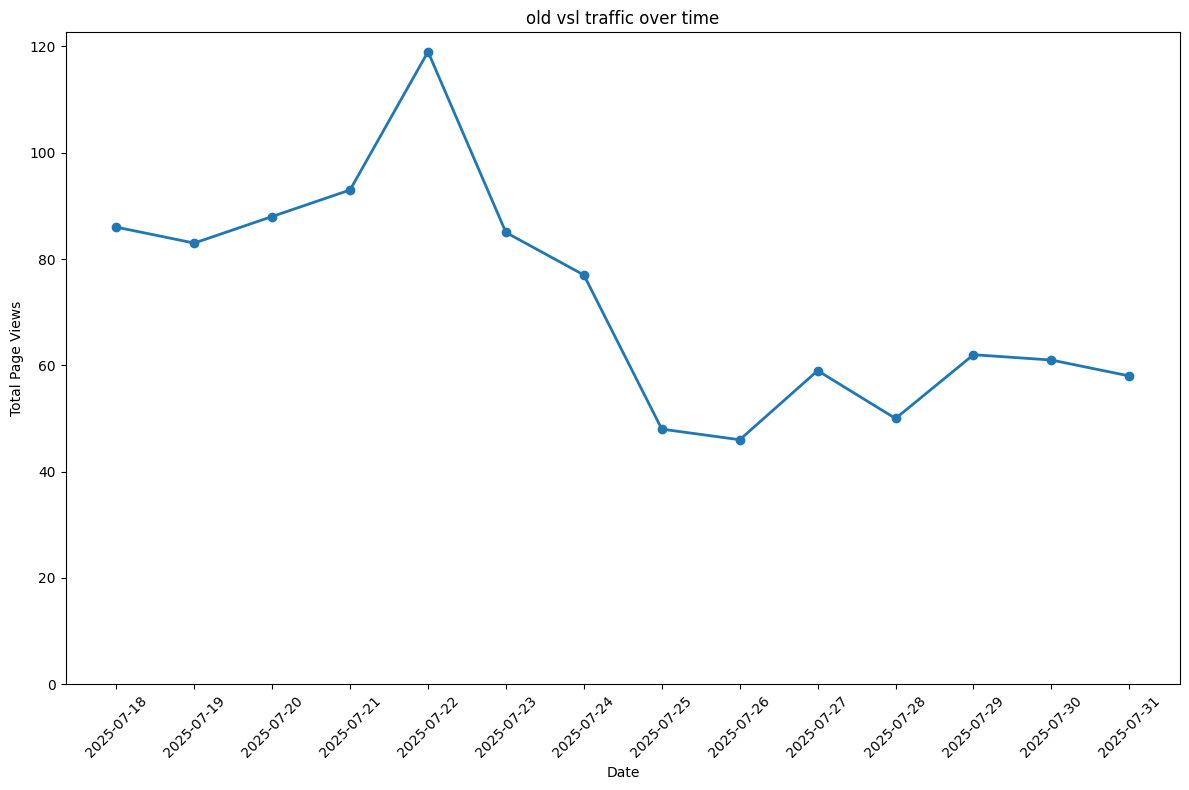

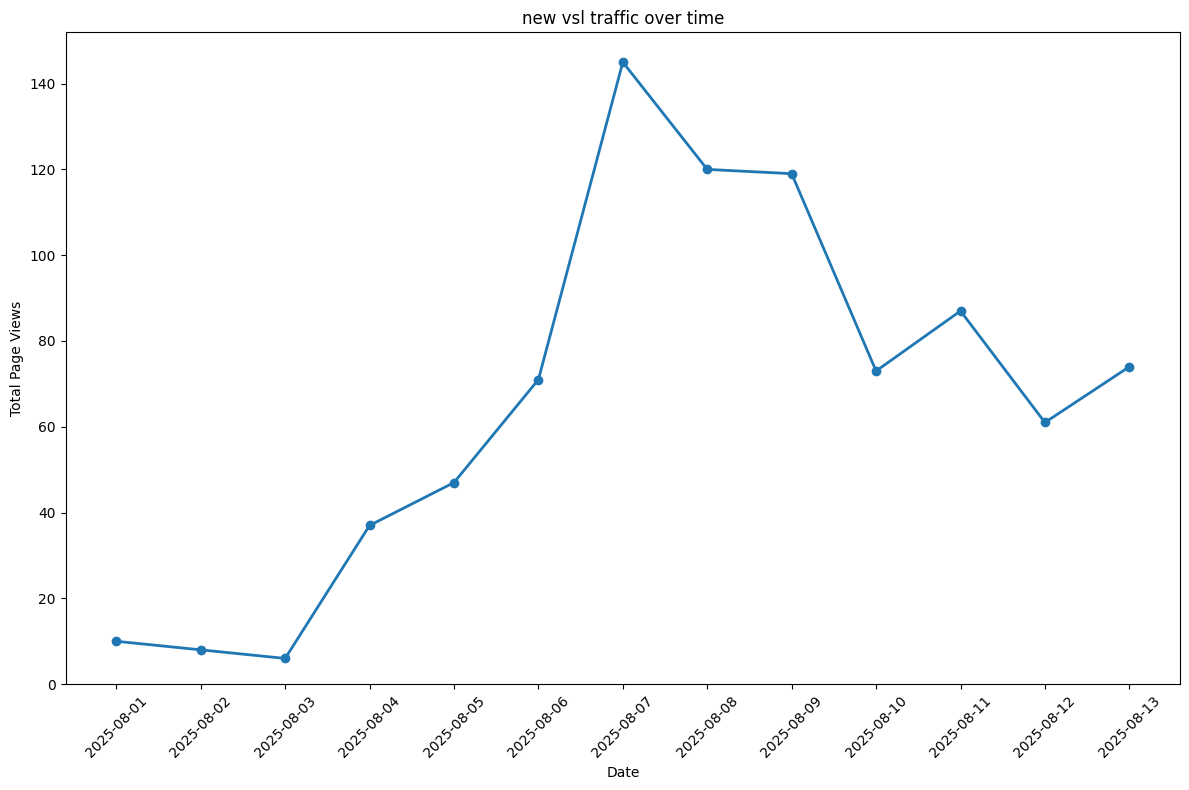

In [44]:
# Group by date only (not datetime)
def plot_group_by_day(ga_df,title,paths):
    # Filter data for the specified paths
    filtered = ga_df[ga_df["pagePath"].isin(paths)]
    
    # Group by date only and sum all page views for that date
    grouped_by_day = filtered.groupby(filtered["date"].dt.date)["screenPageViews"].sum()

    plt.figure(figsize=(12, 8))

    dates = list(grouped_by_day.index)
    values = list(grouped_by_day.values)

    plt.plot(range(len(dates)), values, marker='o', linewidth=2, markersize=6)

    plt.xticks(range(len(dates)), dates, rotation=45)

    plt.ylim(bottom=0)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Total Page Views')
    plt.title(title)

    plt.tight_layout()

    plt.show()

plot_group_by_day(old_vsl,"old vsl traffic over time",["/live-by-design-new/","/live-by-design-new","/"])
plot_group_by_day(new_vsl,"new vsl traffic over time",["/lbd","/","/opt-in-page"])

pagePath
/                                   154
/booking-page-new                     1
/landing                              6
/live-by-design                       0
/live-by-design-new                 394
/live-by-design-new-ghl               7
/live-by-design-new/                467
/live-by-design-next-time             1
/live-by-design-next-time-ghl       197
/qualified                            3
/qualified-for-lbd                   21
/qualified-for-mcm-ghl               47
/thank-you-page-lbd-ghl              11
/thank-you-page-mcm-ghl              22
/time-audit                          18
/to/fBpcVu0z                          2
/v2/preview/52bPsBjnDOMtJv93vuc5      3
/vsl                                  8
/vsl-new-2                           34
Name: screenPageViews, dtype: int64


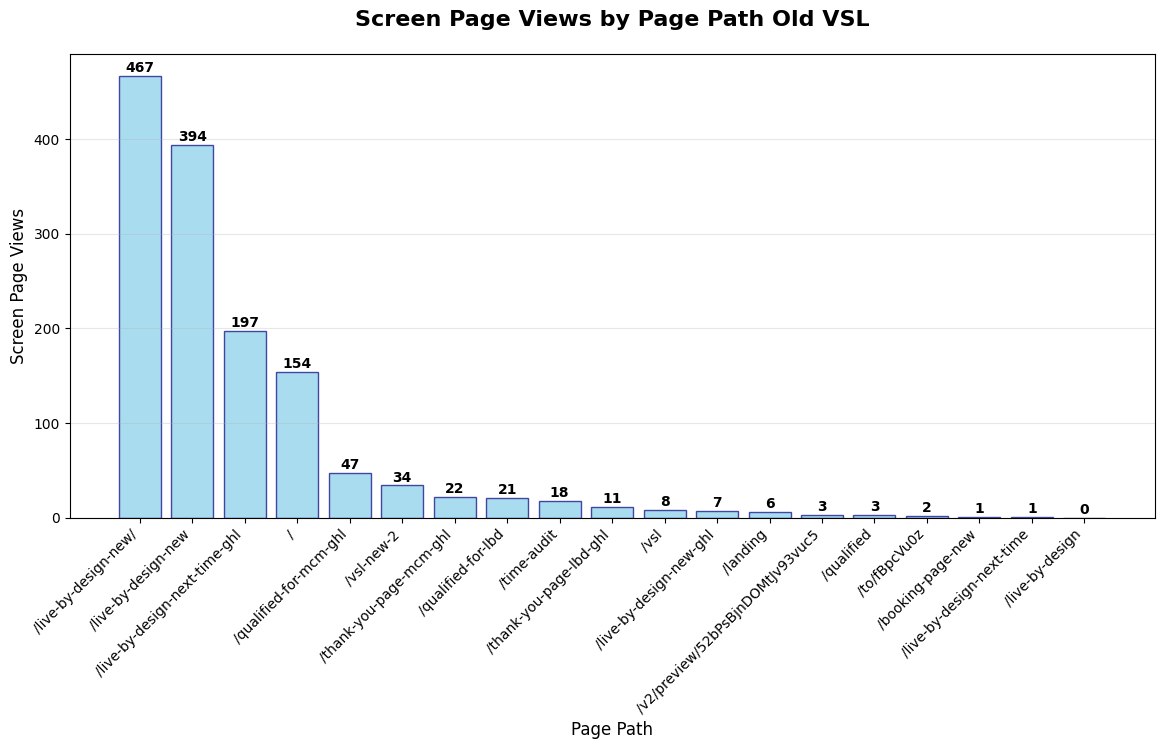

pagePath
/                                   560
/booking                            139
/booking-page-page-360804            16
/burnout-quiz-1579-page               1
/landing                              1
/lbd                                211
/live-by-design                       0
/live-by-design-new                  65
/live-by-design-new-ghl               8
/live-by-design-new/                 89
/live-by-design-next-time-ghl         4
/opt-in-page                         87
/qualified                           12
/thank-you                           13
/thank-you-page-lbd-ghl               4
/thank-you-page-mcm-ghl               1
/time-audit                          11
/to/fBpcVu0z                         10
/v2/preview/BxBWnmW8jW5ju8qiyRxH      6
/vsl                                 72
Name: screenPageViews, dtype: int64


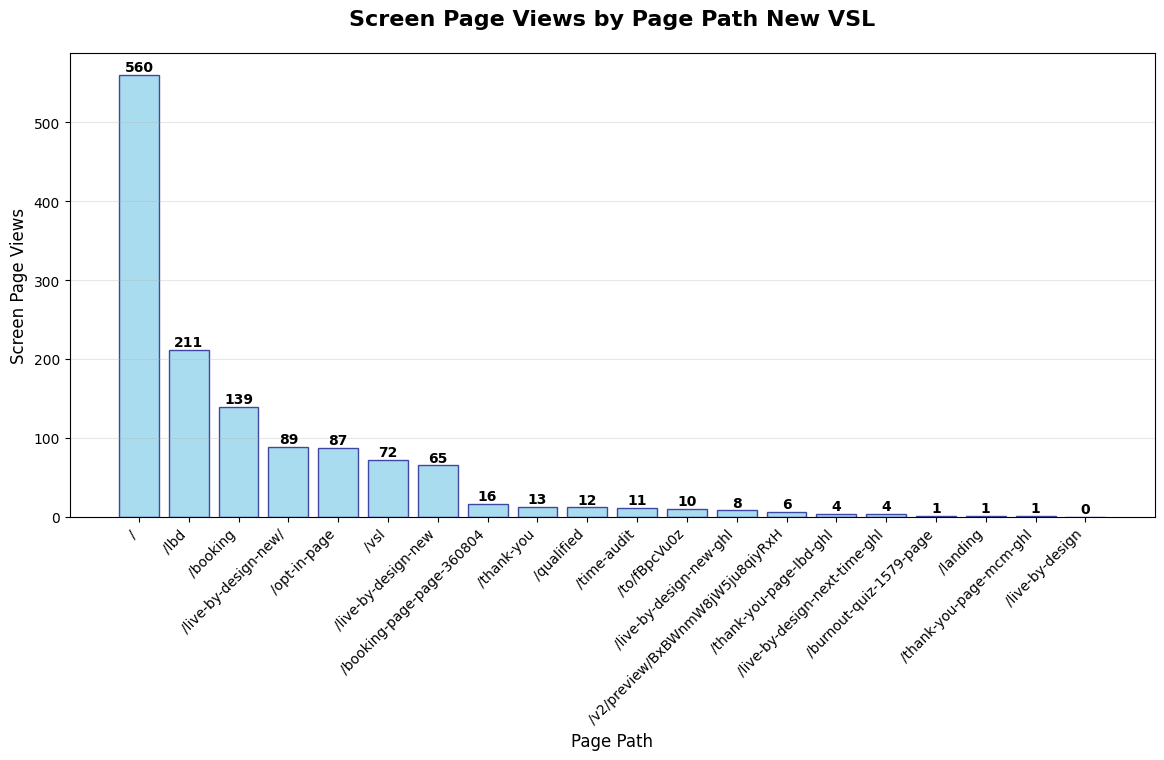

In [45]:
def plot_screen_page_views_by_path(ga_df,title):
    grouped_by_page_views_and_path = ga_df.groupby(["pagePath"])["screenPageViews"].sum()
    # Create the bar chart
    plt.figure(figsize=(14, 8))
    print(grouped_by_page_views_and_path)
    sorted_data = grouped_by_page_views_and_path.sort_values(ascending=False)

    # Create the bar chart
    bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Page Path', fontsize=12)
    plt.ylabel('Screen Page Views', fontsize=12)

    plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # Set y-axis to start from 0
    plt.ylim(bottom=0)

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3)

    # Adjust layout to prevent label cutoff
    plt.subplots_adjust(bottom=0.3)

    plt.show()
plot_screen_page_views_by_path(old_vsl,"Screen Page Views by Page Path Old VSL")
plot_screen_page_views_by_path(new_vsl,"Screen Page Views by Page Path New VSL")


In [46]:
def plot_page_views_sources(ga_df, title, paths):
    # filter out excluded page paths
    df = ga_df[ga_df["pagePath"].isin(paths)]

    # optionally drop source "ghl"
   

    # group by source only (aggregate across all pages)
    grouped_by_source = df.groupby("source")["screenPageViews"].sum()
    
    # sort descending
    sorted_data = grouped_by_source.sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    bars = plt.bar(
        range(len(sorted_data)),
        sorted_data.values,
        color="skyblue",
        edgecolor="navy",
        alpha=0.7,
    )

    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("Source", fontsize=12)
    plt.ylabel("Screen Page Views", fontsize=12)

    source_labels = list(sorted_data.index)
    plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha="right")

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 1,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

    plt.ylim(bottom=0)
    plt.grid(axis="y", alpha=0.3)
    plt.subplots_adjust(bottom=0.3)
    plt.show()

    # return number of sources plotted
    return sorted_data.sum()

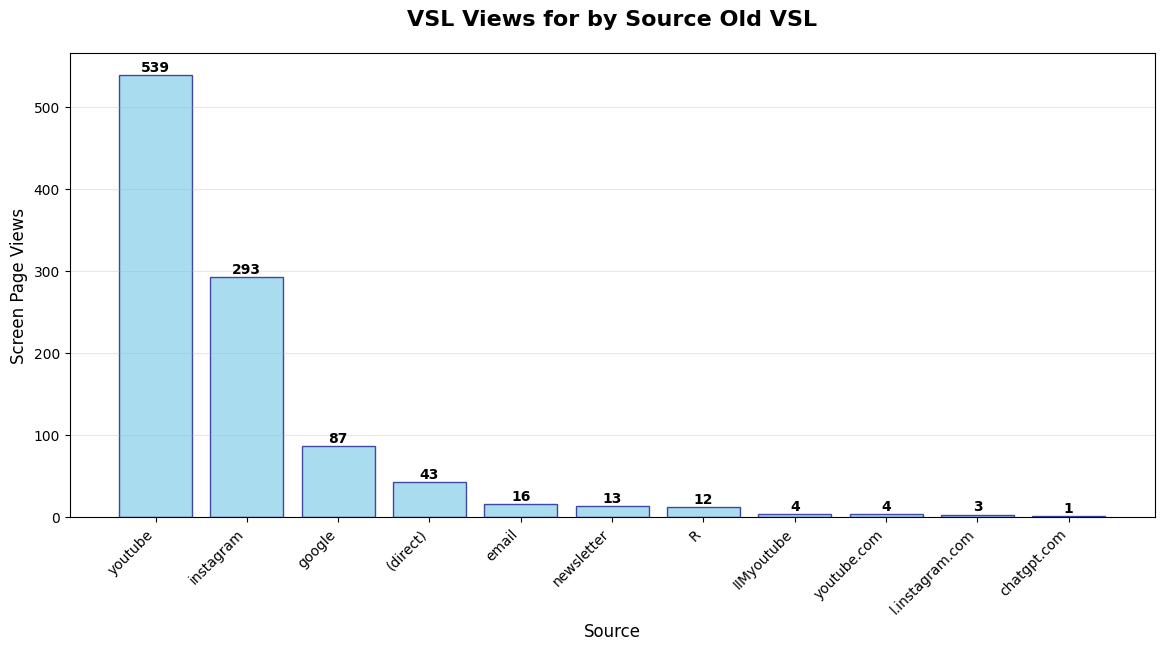

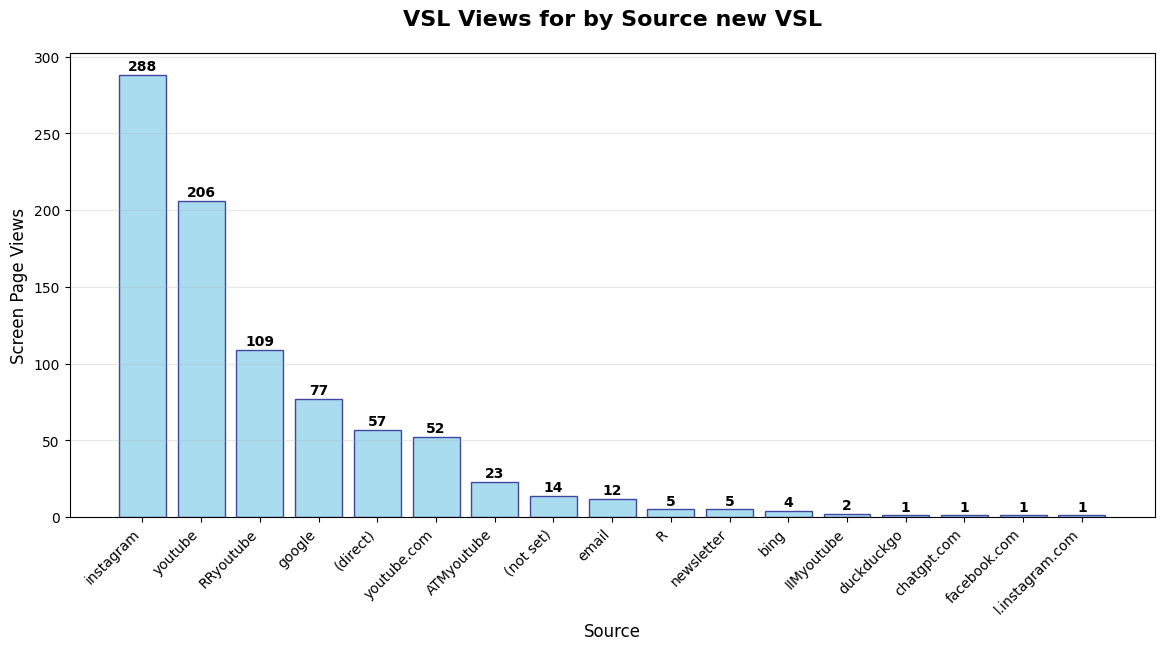

In [47]:

total_old_vsl_page_views = plot_page_views_sources(ga_df=old_vsl, 
                                             title='VSL Views for by Source Old VSL',
                                             paths=["/live-by-design-new/","/live-by-design-new","/"])
total_new_vsl_page_views = plot_page_views_sources(ga_df=new_vsl, 
                                             title='VSL Views for by Source new VSL',
                                             paths=["/lbd","/","/opt-in-page"])



In [48]:
print(total_old_vsl_page_views)
print(total_new_vsl_page_views)

1015
858


pagePath
/             119.646389
/booking       30.839790
/lbd           74.682355
/thank-you    829.904632
Name: averageSessionDuration, dtype: float64


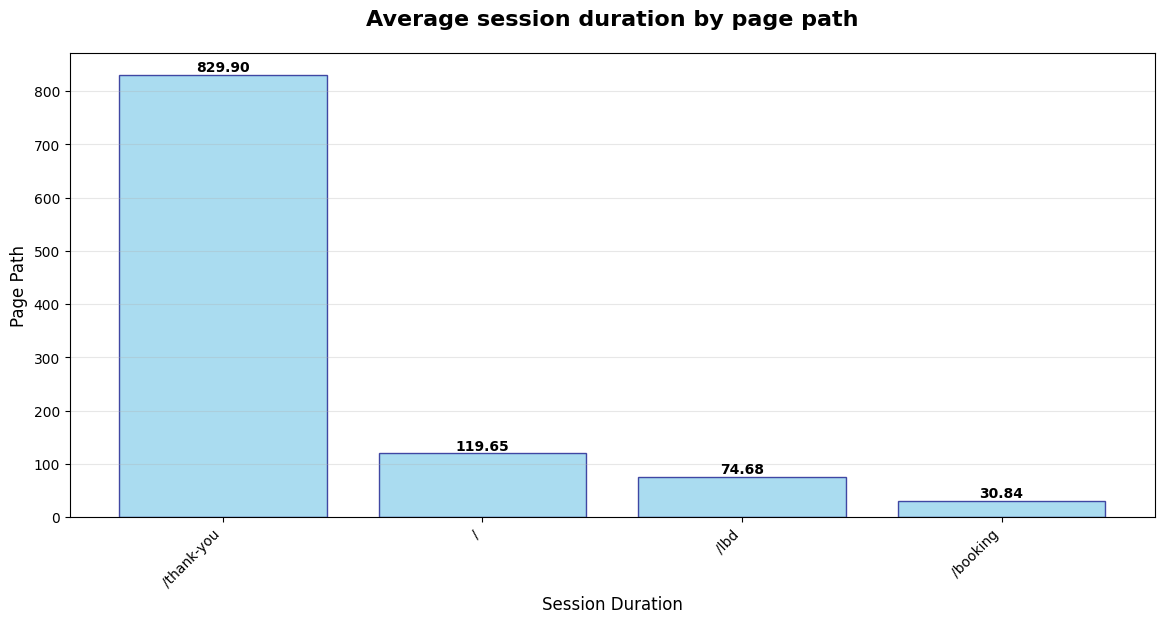

In [ ]:
avg_session_duration_by_page_path = new_vsl.groupby("pagePath")["averageSessionDuration"].mean()

plt.figure(figsize=(14, 8))
filtered_data = avg_session_duration_by_page_path[avg_session_duration_by_page_path.index.get_level_values('pagePath').isin(['/lbd','/',"/opt-in-page",'/booking','/thank-you'])]
print(filtered_data)
sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Average session duration by page path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Session Duration', fontsize=12)
plt.ylabel('Page Path', fontsize=12)

# Extract only the source names for x-axis labels
plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{float(height):.2f}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

pagePath
/                          143.738884
/live-by-design-new         99.459476
/live-by-design-new/        90.261934
/qualified-for-mcm-ghl     113.829400
/thank-you-page-lbd-ghl     27.034397
/thank-you-page-mcm-ghl    229.894947
Name: averageSessionDuration, dtype: float64


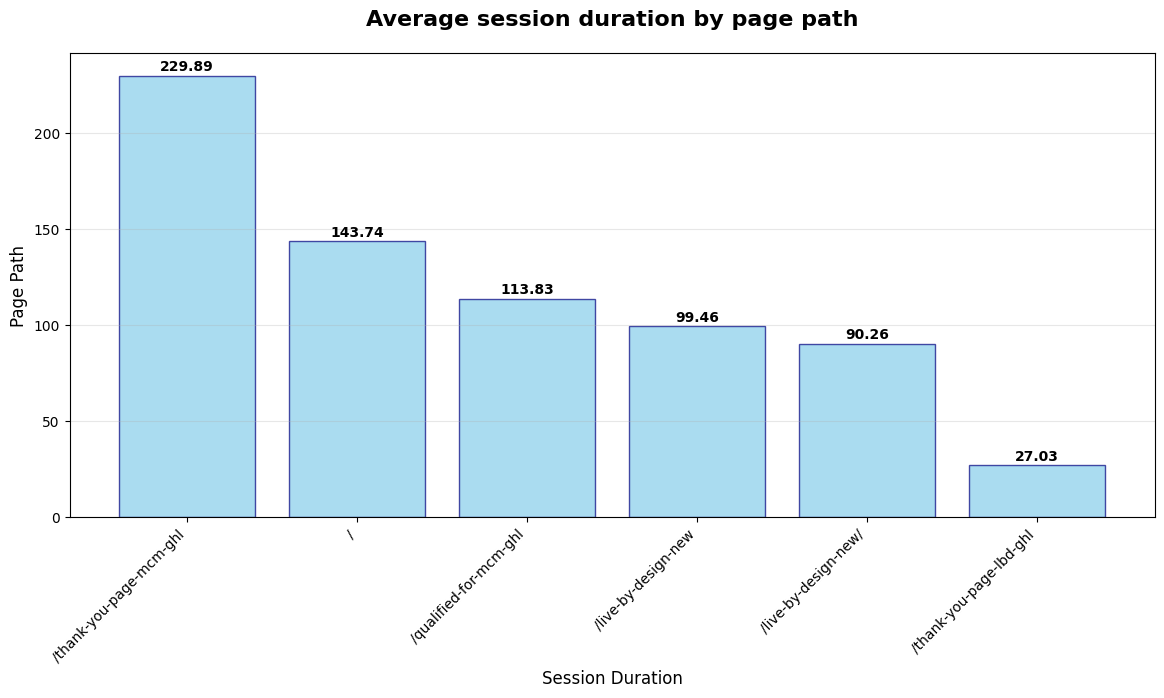

In [56]:
avg_session_duration_by_page_path = old_vsl.groupby("pagePath")["averageSessionDuration"].mean()

plt.figure(figsize=(14, 8))
filtered_data = avg_session_duration_by_page_path[avg_session_duration_by_page_path.index.get_level_values('pagePath').isin(["/live-by-design-new/","/live-by-design-new","/","/qualified-for-mcm-ghl","/qualified-for-lbd-ghl","/thank-you-page-lbd-ghl","/thank-you-page-mcm-ghl"])]
print(filtered_data)
sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Average session duration by page path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Session Duration', fontsize=12)
plt.ylabel('Page Path', fontsize=12)

# Extract only the source names for x-axis labels
plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{float(height):.2f}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

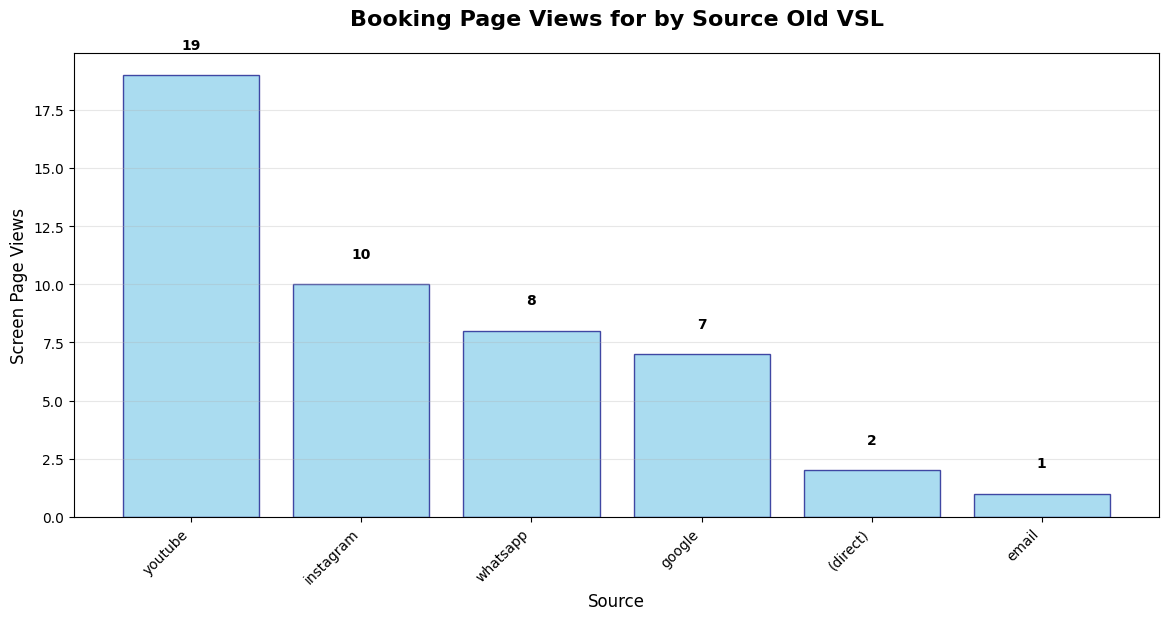

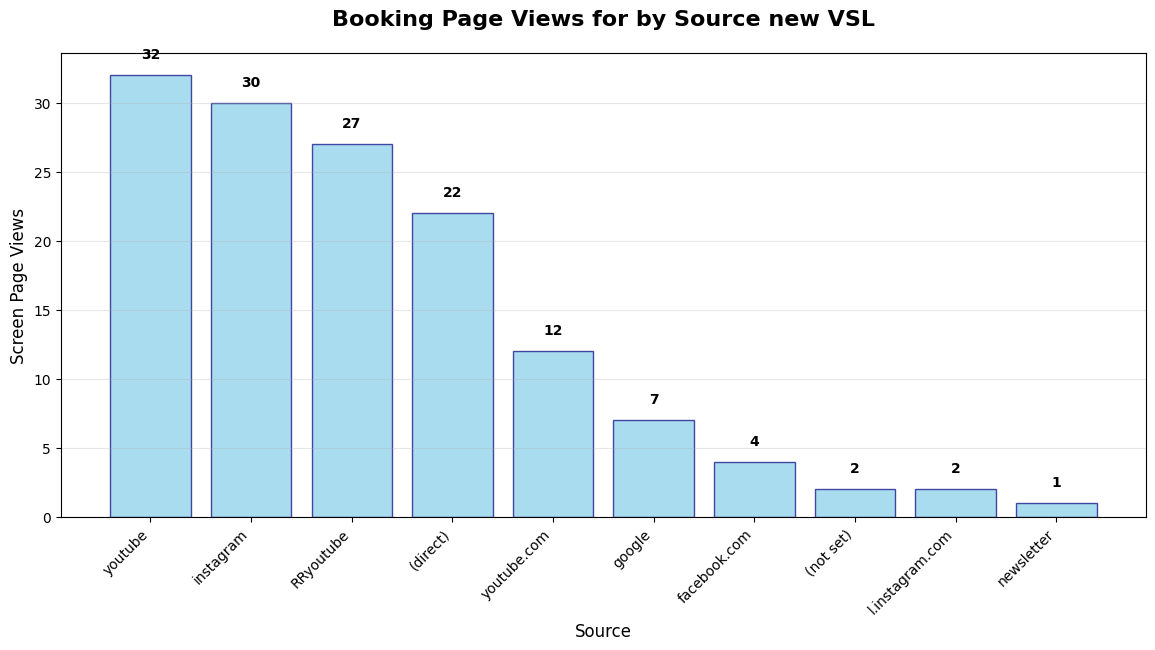

47
139


In [50]:

old_booking_page_views = plot_page_views_sources(ga_df=old_vsl, 
                                             title='Booking Page Views for by Source Old VSL',
                                             paths=["/qualified-for-mcm-ghl","/qualified-for-lbd-ghl"])
new_booking_page_views = plot_page_views_sources(ga_df=new_vsl, 
                                             title='Booking Page Views for by Source new VSL',
                                             paths=["/booking"])

print(old_booking_page_views)
print(new_booking_page_views)

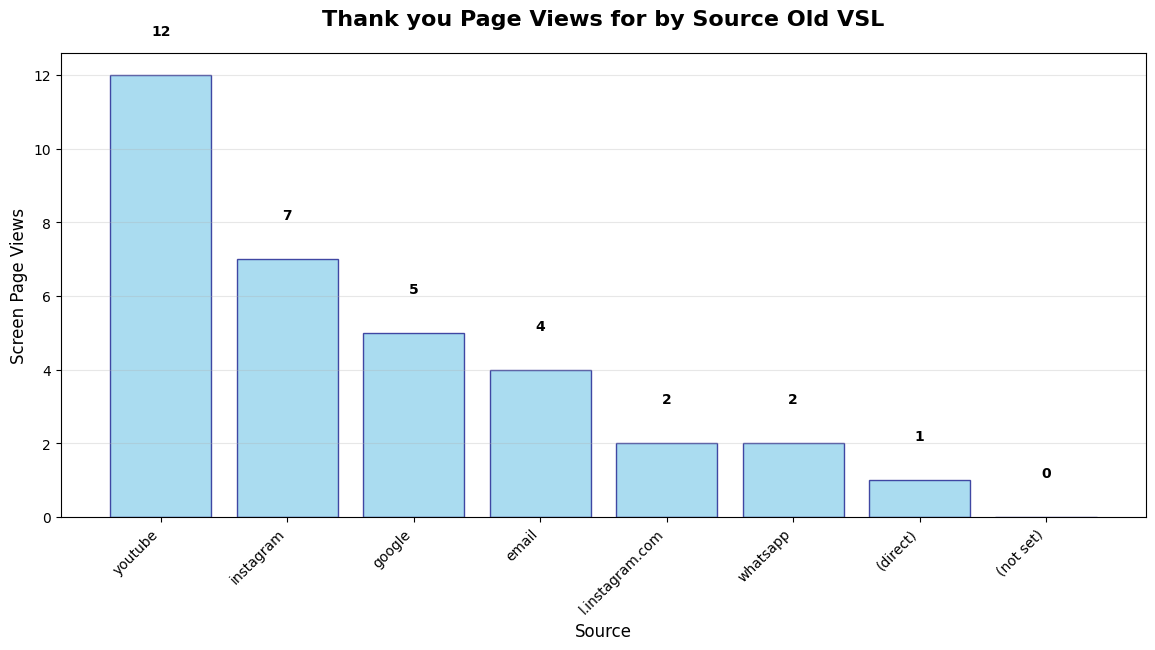

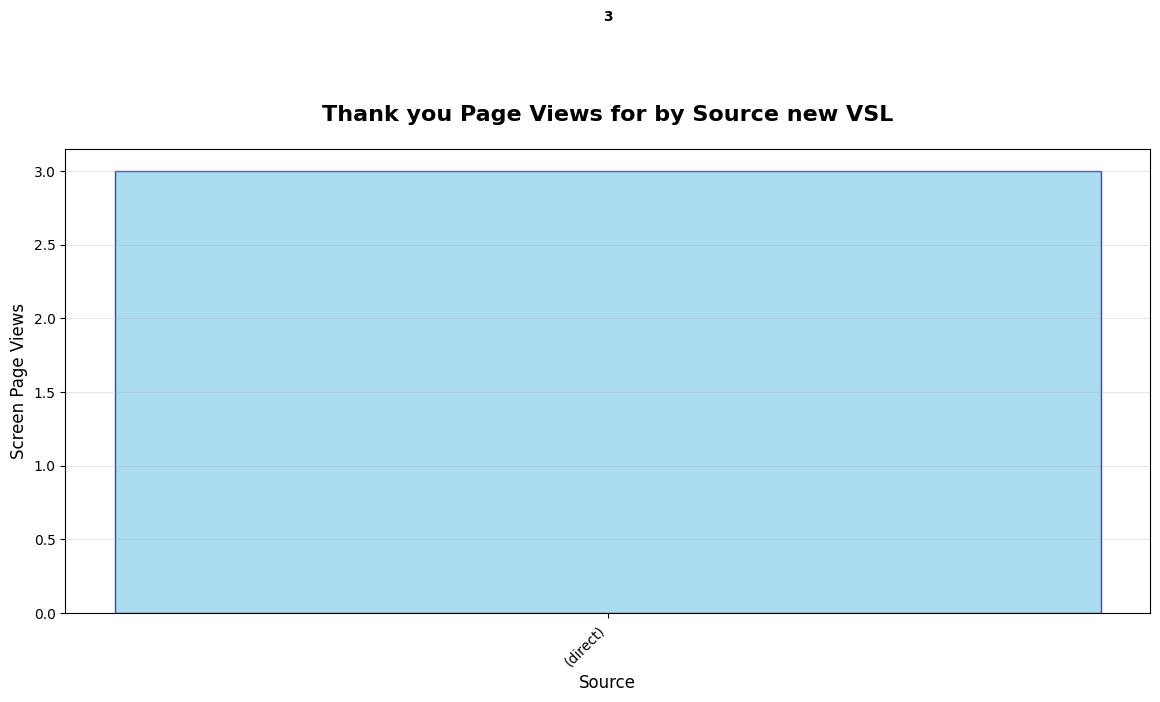

33
3


In [54]:
old_thankyou_page_views = plot_page_views_sources(ga_df=old_vsl, 
                                             title='Thank you Page Views for by Source Old VSL',
                                             paths=["/thank-you-page-lbd-ghl","/thank-you-page-mcm-ghl"])
new_vsl = new_vsl[(new_vsl["source"] != "RRyoutube") & (new_vsl["source"] != "email") ]

new_thankyou_page_views = plot_page_views_sources(ga_df=new_vsl, 
                                             title='Thank you Page Views for by Source new VSL',
                                             paths=["/thank-you"])


print(old_thankyou_page_views)
print(new_thankyou_page_views)

In [52]:
print(new_vsl["date"].value_counts().sort_values())

date
2025-08-03     38
2025-08-01     64
2025-08-02     65
2025-08-05     67
2025-08-13     71
2025-08-06     72
2025-08-04     73
2025-08-12     79
2025-08-10     84
2025-08-11     90
2025-08-08    108
2025-08-09    114
2025-08-07    139
Name: count, dtype: int64
